
## Unbalanced dataset



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
# Generate a synthetic unbalanced dataset
X, y = make_classification(
    n_samples=1000,     # 1000 samples
    n_features=20,      # 20 features
    n_informative=2,    # 2 informative features
    n_redundant=10,     # 10 redundant features
    n_classes=2,        # Binary classification
    weights=[0.95, 0.05], # 95% of samples in class 0, 5% in class 1 (imbalanced)
    flip_y=0,           # No noise in labels
    random_state=42     # Set random seed for reproducibility
)

In [13]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(X.shape[1])])
df['target'] = y

# Check the class distribution
print("Class distribution:")
print(df['target'].value_counts())


Class distribution:
target
0    950
1     50
Name: count, dtype: int64


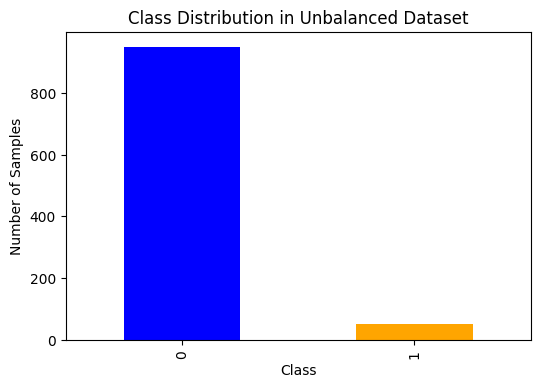

In [14]:
# Plot class distribution
plt.figure(figsize=(6, 4))
df['target'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution in Unbalanced Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
# Fit a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       282
           1       1.00      0.72      0.84        18

    accuracy                           0.98       300
   macro avg       0.99      0.86      0.91       300
weighted avg       0.98      0.98      0.98       300




Confusion Matrix:
[[282   0]
 [  5  13]]


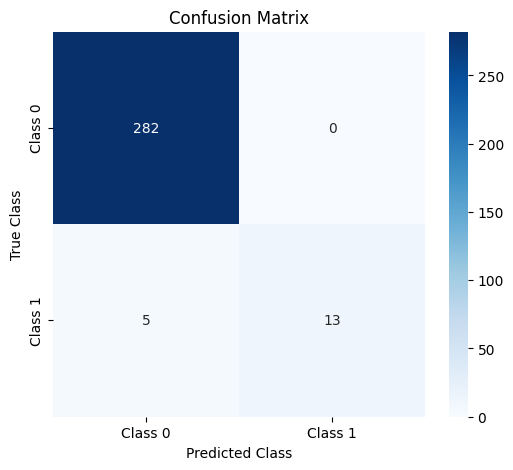

In [21]:
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
